# Importing dataset and Data cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy
import pandas
import matplotlib
import tqdm

!unzip -n /content/drive/MyDrive/dataset/TMDB_movie_dataset_v11.csv.zip
df = pandas.read_csv('TMDB_movie_dataset_v11.csv')

Archive:  /content/drive/MyDrive/dataset/TMDB_movie_dataset_v11.csv.zip
  inflating: TMDB_movie_dataset_v11.csv  


In [ ]:
df.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

   original_language   original_title  \
0                 en        Inception   
1                 en     Interstellar   
2                 en  The Dark Knight   
3                 en           Avatar   
4                 en     The Avengers   

                                            overview popularity  \
0  Cobb, a skilled thief who commits corporate es...     83.952   
1  The adventures of a group of explorers who mak...    140.241   
2  Batman raises the stakes in his war on crime. ...    130.643   
3  In the 22nd century, a paraplegic Marine is di...     79.932   
4  When an unexpected enemy emerges and threatens...     98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  
0  English, French, Japanese, Swahili  
1                             English  
2                   English, Mandarin  
3                    English, Spanish  
4             English, Hindi, Russian  

[5 rows x 23 columns]

In [ ]:
#Label encoding original_language

import pandas as pd

# Creating a mapping dictionary
unique_values = df['original_language'].unique()
mapping = {k: v for v, k in enumerate(unique_values)}

# Applying the mapping
df['original_language'] = df['original_language'].map(mapping)
df


id                           title  vote_average  vote_count  \
0         27205                       Inception         8.364       34495   
1        157336                    Interstellar         8.417       32571   
2           155                 The Dark Knight         8.512       30619   
3         19995                          Avatar         7.573       29815   
4         24428                    The Avengers         7.710       29166   
...         ...                             ...           ...         ...   
960071   644504  A Bad Case of the Genre Fusion         0.000           0   
960072   644506           Τα σημάδια της νύχτας         0.000           0   
960073   644507                  Nowhere To Put         0.000           0   
960074   644510             Κλεφτρόνι αγάπη μου         0.000           0   
960075  1211085                   Terminal Crab         0.000           0   

          status release_date     revenue  runtime  adult  \
0       Released   2010-07-15   825532764      148  False   
1       Released   2014-11-05   701729206      169  False   
2       Released   2008-07-16  1004558444      152  False   
3       Released   2009-12-15  2923706026      162  False   
4       Released   2012-04-25  1518815515      143  False   
...          ...          ...         ...      ...    ...   
960071  Released   2013-09-10           0        5  False   
960072  Released   1990-01-01           0        0  False   
960073  Released          NaN           0        0  False   
960074  Released   1987-01-01           0        0  False   
960075  Released   2023-12-06          25        3  False   

                           backdrop_path  ...  original_language  \
0       /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...                  0   
1       /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...                  0   
2       /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...                  0   
3       /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...                  0   
4       /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...                  0   
...                                  ...  ...                ...   
960071                               NaN  ...                  1   
960072                               NaN  ...                 16   
960073                               NaN  ...                  5   
960074                               NaN  ...                 16   
960075  /usOHj4eNcATkoE6JwJHM0sYFs1n.jpg  ...                  0   

               original_title  \
0                   Inception   
1                Interstellar   
2             The Dark Knight   
3                      Avatar   
4                The Avengers   
...                       ...   
960071         우리 상우와 만나지 말아요   
960072  Τα σημάδια της νύχτας   
960073         Nowhere To Put   
960074    Κλεφτρόνι αγάπη μου   
960075          Terminal Crab   

                                                 overview  popularity  \
0       Cobb, a skilled thief who commits corporate es...      83.952   
1       The adventures of a group of explorers who mak...     140.241   
2       Batman raises the stakes in his war on crime. ...     130.643   
3       In the 22nd century, a paraplegic Marine is di...      79.932   
4       When an unexpected enemy emerges and threatens...      98.082   
...                                                   ...         ...   
960071  Sang-woo's mother who gives money to her to br...       0.600   
960072                                                NaN       0.600   
960073                                                NaN       0.600   
960074                                                NaN       0.600   
960075  A man's rare condition is the catalyst for a l...       0.000   

                             poster_path  \
0       /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1       /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2       /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3       /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4        /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   


In [ ]:
#label encoding adult

import pandas as pd

# Creating a mapping dictionary
unique_values = df['adult'].unique()
mapping = {k: v for v, k in enumerate(unique_values)}

# Applying the mapping
df['adult'] = df['adult'].map(mapping)
df


id                           title  vote_average  vote_count  \
0         27205                       Inception         8.364       34495   
1        157336                    Interstellar         8.417       32571   
2           155                 The Dark Knight         8.512       30619   
3         19995                          Avatar         7.573       29815   
4         24428                    The Avengers         7.710       29166   
...         ...                             ...           ...         ...   
960071   644504  A Bad Case of the Genre Fusion         0.000           0   
960072   644506           Τα σημάδια της νύχτας         0.000           0   
960073   644507                  Nowhere To Put         0.000           0   
960074   644510             Κλεφτρόνι αγάπη μου         0.000           0   
960075  1211085                   Terminal Crab         0.000           0   

          status release_date     revenue  runtime  adult  \
0       Released   2010-07-15   825532764      148      0   
1       Released   2014-11-05   701729206      169      0   
2       Released   2008-07-16  1004558444      152      0   
3       Released   2009-12-15  2923706026      162      0   
4       Released   2012-04-25  1518815515      143      0   
...          ...          ...         ...      ...    ...   
960071  Released   2013-09-10           0        5      0   
960072  Released   1990-01-01           0        0      0   
960073  Released          NaN           0        0      0   
960074  Released   1987-01-01           0        0      0   
960075  Released   2023-12-06          25        3      0   

                           backdrop_path  ...  original_language  \
0       /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...                  0   
1       /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...                  0   
2       /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...                  0   
3       /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...                  0   
4       /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...                  0   
...                                  ...  ...                ...   
960071                               NaN  ...                  1   
960072                               NaN  ...                 16   
960073                               NaN  ...                  5   
960074                               NaN  ...                 16   
960075  /usOHj4eNcATkoE6JwJHM0sYFs1n.jpg  ...                  0   

               original_title  \
0                   Inception   
1                Interstellar   
2             The Dark Knight   
3                      Avatar   
4                The Avengers   
...                       ...   
960071         우리 상우와 만나지 말아요   
960072  Τα σημάδια της νύχτας   
960073         Nowhere To Put   
960074    Κλεφτρόνι αγάπη μου   
960075          Terminal Crab   

                                                 overview  popularity  \
0       Cobb, a skilled thief who commits corporate es...      83.952   
1       The adventures of a group of explorers who mak...     140.241   
2       Batman raises the stakes in his war on crime. ...     130.643   
3       In the 22nd century, a paraplegic Marine is di...      79.932   
4       When an unexpected enemy emerges and threatens...      98.082   
...                                                   ...         ...   
960071  Sang-woo's mother who gives money to her to br...       0.600   
960072                                                NaN       0.600   
960073                                                NaN       0.600   
960074                                                NaN       0.600   
960075  A man's rare condition is the catalyst for a l...       0.000   

                             poster_path  \
0       /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1       /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2       /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3       /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4        /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   


In [ ]:
# Check for na values over 2d
print(f'Presence of NA values in the dataset : {df.isna().any().any()}')
print(f'Columns : {list(df.columns)}')

Presence of NA values in the dataset : True
Columns : ['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']


detect NAN values



In [ ]:
# No imdb index
df[df['imdb_id'].isna()] # 382247

id                                          title  vote_average  \
5345     567604                           Once Upon a Deadpool         7.146   
5531     836466                                         Return         6.291   
7414    1040330              Black Adam: Saviour or Destroyer?         6.998   
7677     916035                          Barely Legal Baby Fat         6.792   
8878     665399  BTS World Tour: Love Yourself - Japan Edition         9.172   
...         ...                                            ...           ...   
960067   644511                                         Fuck 9         0.000   
960069   644500                                           Egg!         0.000   
960071   644504                 A Bad Case of the Genre Fusion         0.000   
960073   644507                                 Nowhere To Put         0.000   
960075  1211085                                  Terminal Crab         0.000   

        vote_count    status release_date  revenue  runtime  adult  \
5345           646  Released   2018-12-11        0      118      0   
5531           619  Released   2020-06-10        0       12      0   
7414           404  Released   2022-10-15        0       22      0   
7677           384  Released   2008-06-26        0       90      1   
8878           306  Released   2019-10-09        0      231      0   
...            ...       ...          ...      ...      ...    ...   
960067           0  Released   2016-03-06        0       85      1   
960069           0  Released   2014-07-22        0        8      0   
960071           0  Released   2013-09-10        0        5      0   
960073           0  Released          NaN        0        0      0   
960075           0  Released   2023-12-06       25        3      0   

                           backdrop_path  ...  original_language  \
5345    /3M9ZKIx4khmyll2DGB5zil626UA.jpg  ...                  0   
5531                                 NaN  ...                  0   
7414    /jVsbzy5gj3McD8V6dDr7EMrLSqT.jpg  ...                  0   
7677                                 NaN  ...                  0   
8878                                 NaN  ...                  1   
...                                  ...  ...                ...   
960067  /jeBC31dz1oKYHQphwyI4Q0dZngi.jpg  ...                  0   
960069                               NaN  ...                  1   
960071                               NaN  ...                  1   
960073                               NaN  ...                  5   
960075  /usOHj4eNcATkoE6JwJHM0sYFs1n.jpg  ...                  0   

                                       original_title  \
5345                             Once Upon a Deadpool   
5531                                           Return   
7414                Black Adam: Saviour or Destroyer?   
7677                            Barely Legal Baby Fat   
8878    BTS World Tour: Love Yourself - Japan Edition   
...                                               ...   
960067                                         Fuck 9   
960069                                            에그!   
960071                                 우리 상우와 만나지 말아요   
960073                                 Nowhere To Put   
960075                                  Terminal Crab   

                                                 overview  popularity  \
5345    A kidnapped Fred Savage is forced to endure De...      23.001   
5531    A single man has worked most of his life in a ...       7.915   
7414    Ahead of the release of upcoming fantasy film ...      10.918   
7677    Nobody finds hotter girls just days after the ...       5.400   
8878    BTS perform their Japan concert at Tokyo Dome ...       4.892   
...                                                   ...         ...   
960067  Treasure Island Media's best gut breeding, cum...       0.600   
960069  There is a man whose eyes are made of eggs. On...       0.600   
960071  Sang-woo's mother who gives money to her to 

In [ ]:
df['status'].unique()

array(['Released', 'Planned', 'Rumored', 'Post Production',
       'In Production', 'Canceled'], dtype=object)

In [ ]:
# '1500-01-01'
rd = pandas.to_datetime(df['release_date'], format='%Y-%m-%d', errors = 'coerce')
imaginary_movies = df[rd.isna()]
no_imag_df = df.drop(imaginary_movies.index)
# Checking for round hay garden scene ! (The oldest movie : https://www.oldest.org/entertainment/movies/)
no_imag_df['release_date'] = pandas.to_datetime(no_imag_df['release_date'], format='%Y-%m-%d')

import datetime
no_imag_df[no_imag_df['release_date'] < numpy.datetime64('1881')].__len__()

28

In [ ]:
historic_films = no_imag_df[no_imag_df['release_date'] < numpy.datetime64('1891')]
no_hist_df = no_imag_df.drop(historic_films.index)

joke_movies = no_hist_df[no_hist_df['release_date'] > numpy.datetime64('2030')]

**Note** These are all joke listings of a movie hence we can safely remove these

In [ ]:
no_hist_fut_df = no_hist_df.drop(joke_movies.index)

In [ ]:
released_movies = no_hist_fut_df[no_hist_fut_df['status'] == 'Released']
rumored_movies = no_hist_fut_df[no_hist_fut_df['status'] =='Rumored']
planned_movies = no_hist_fut_df[no_hist_fut_df['status'] =='Planned']
inproduction_movies = no_hist_fut_df[no_hist_fut_df['status'] =='In Production']
postproduction_movies = no_hist_fut_df[no_hist_fut_df['status'] =='Post Production']
cancelled_movies = no_hist_fut_df[no_hist_fut_df['status'] =='Canceled']

In [ ]:
print(f'Length of Historic movies        : {historic_films.__len__()}')
print(f'Length of Future movies          : {planned_movies.__len__()}')
print(f'Length of Joke movies            : {joke_movies.__len__()}')
print(f'Length of Cancelled movies       : {cancelled_movies.__len__()}')
print(f'Length of Released movies        : {released_movies.__len__()}')
print(f'Length of Rumored movies         : {rumored_movies.__len__()}')
print(f'Length of Inproduction movies    : {inproduction_movies.__len__()}')
print(f'Length of Post production movies : {postproduction_movies.__len__()}')
print(f'Length of Cancelled movies       : {cancelled_movies.__len__()}')

Length of Historic movies        : 49
Length of Future movies          : 261
Length of Joke movies            : 6
Length of Cancelled movies       : 4
Length of Released movies        : 862932
Length of Rumored movies         : 7
Length of Inproduction movies    : 1802
Length of Post production movies : 993
Length of Cancelled movies       : 4


# Preliminary Data analysis

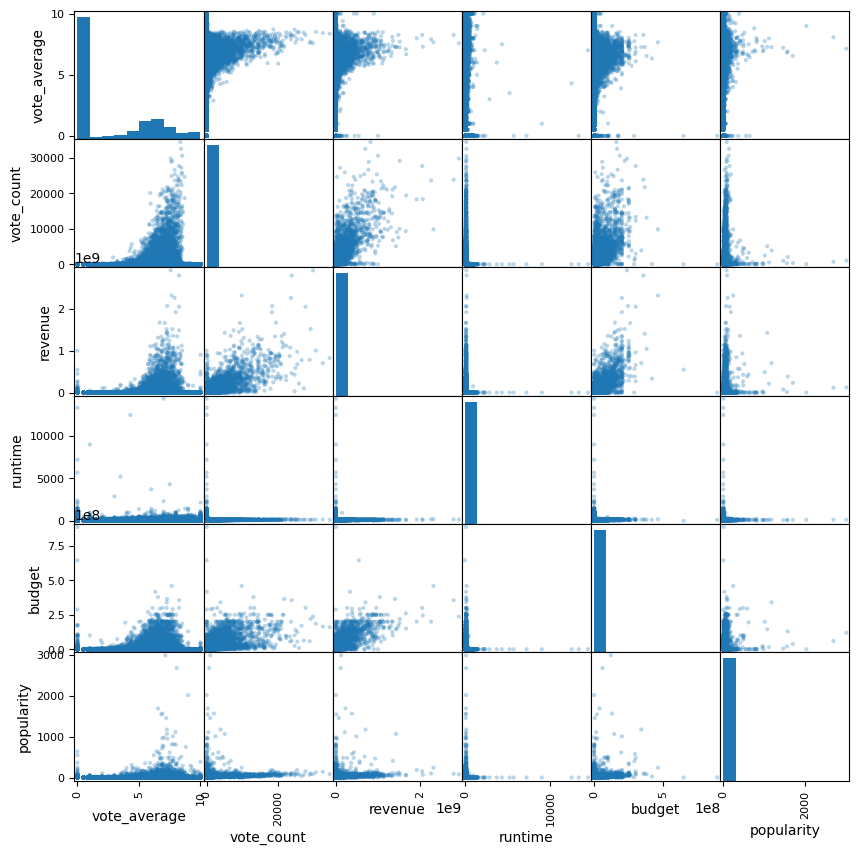

In [ ]:
numerical_columns : list[str] = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']

# fig, axs = matplotlib.pyplot.subplots(len(numerical_columns), len(numerical_columns))
# for idx, col1 in enumerate(numerical_columns):
#     for idx2, col2 in enumerate(numerical_columns):
#         if (idx == idx2):
#             axs[idx, idx2].hist(df[col1])
#         if (idx > idx2):
#             axs[idx, idx2].scatter(x = df[col1], y = df[col2], alpha = 0.5)

_ = pandas.plotting.scatter_matrix(released_movies[numerical_columns], figsize = (10,10), alpha = 0.3)

In [ ]:
# Correlations

corr = released_movies[numerical_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# This is an attempt to heirarchicaly cluster the above dataset
import scipy

# Why is there no documentation for this >>>>?????
pairwise_dist_mat = scipy.spatial.distance.pdist(corr)
linkage_matrix = scipy.cluster.hierarchy.linkage(pairwise_dist_mat, 'complete')
idx = scipy.cluster.hierarchy.fcluster(linkage_matrix, 0.5 * pairwise_dist_mat.max(), 'distance')

columns = [released_movies[numerical_columns].columns.tolist()[i] for i in list((numpy.argsort(idx)))]
corr = released_movies[numerical_columns][columns].corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-50-4670104765b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])
<ipython-input-50-4670104765b5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['runtime_category'] = pd.cut(released_movies['runtime'], bins=runtime_bins, labels=runtime_labels, right=False)


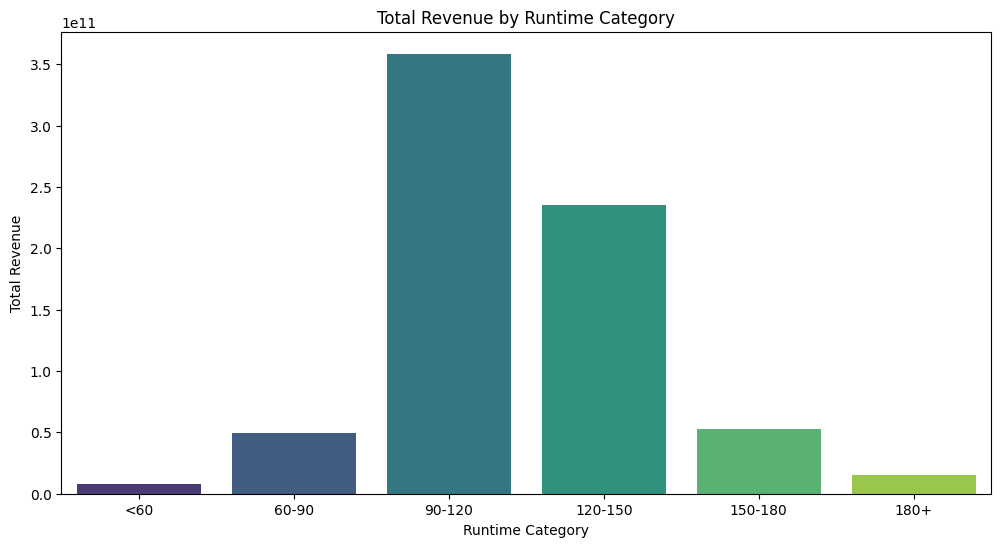

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'release_date' is in datetime format, if not, convert it first
released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])

# Define bins for runtime
runtime_bins = [0, 60, 90, 120, 150, 180, float('inf')]
runtime_labels = ['<60', '60-90', '90-120', '120-150', '150-180', '180+']

# Add a new column 'runtime_category' based on bins
released_movies['runtime_category'] = pd.cut(released_movies['runtime'], bins=runtime_bins, labels=runtime_labels, right=False)

# Check for Duplicate Rows
duplicate_rows = released_movies.duplicated(subset=['runtime_category', 'id'], keep=False)
released_movies_no_duplicates = released_movies[~duplicate_rows]

# Group by 'runtime_category' and calculate the total revenue for each category
revenue_by_runtime = released_movies_no_duplicates.groupby('runtime_category')['revenue'].sum().reset_index()

# Set up the figure and axis
plt.figure(figsize=(12, 6))
sns.barplot(x='runtime_category', y='revenue', data=revenue_by_runtime, palette='viridis')

# Customize the plot
plt.title('Total Revenue by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()



<ipython-input-49-1b018c10338b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])
<ipython-input-49-1b018c10338b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['runtime_category'] = pd.cut(released_movies['runtime'], bins=runtime_bins, labels=runtime_labels, right=False)


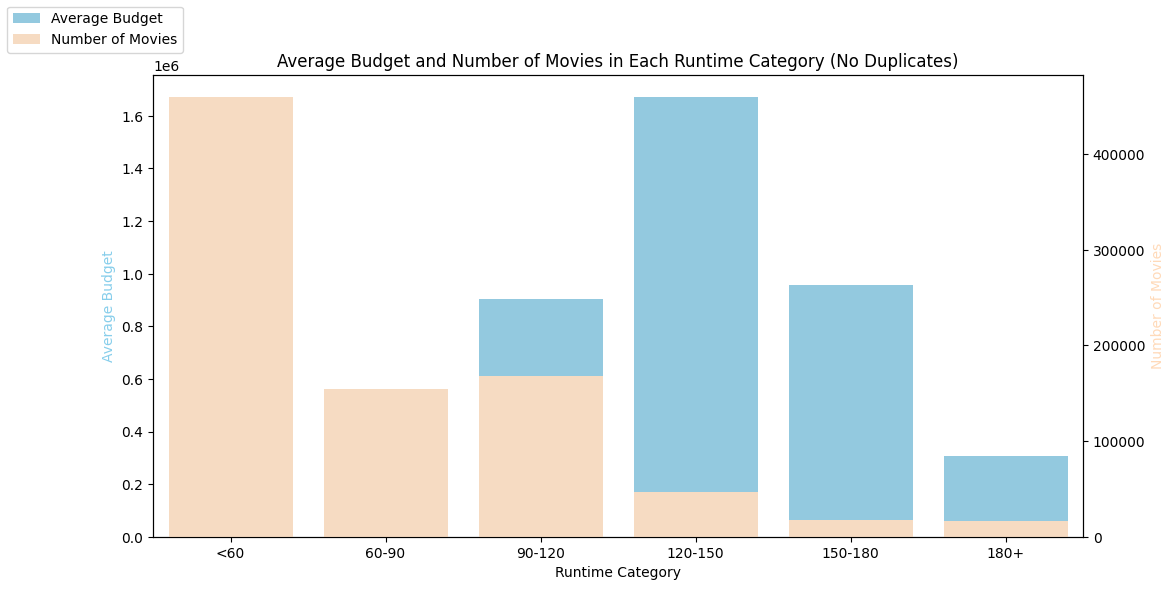

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'release_date' is in datetime format, if not, convert it first
released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])

# Define bins for runtime
runtime_bins = [0, 60, 90, 120, 150, 180, float('inf')]
runtime_labels = ['<60', '60-90', '90-120', '120-150', '150-180', '180+']

# Add a new column 'runtime_category' based on bins
released_movies['runtime_category'] = pd.cut(released_movies['runtime'], bins=runtime_bins, labels=runtime_labels, right=False)

# Check for Duplicate Rows
duplicate_rows = released_movies.duplicated(subset=['runtime_category', 'id'], keep=False)
released_movies_no_duplicates = released_movies[~duplicate_rows]

# Part 1: Explore Budget and Number of Movies in Each Runtime Bucket
budget_and_count = released_movies_no_duplicates.groupby('runtime_category').agg({'budget': 'mean', 'id': 'count'}).reset_index()

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for 'Average Budget' (Green)
sns.barplot(x='runtime_category', y='budget', data=budget_and_count, color="#87CEEB", ax=ax1, label='Average Budget')

# Set up the second y-axis to share the same x-axis
ax2 = ax1.twinx()
# Bar plot for 'Number of Movies' (Blue)
sns.barplot(x='runtime_category', y='id', data=budget_and_count, color="#FFDAB9", ax=ax2, label='Number of Movies')

# Customize the plot
ax1.set_title('Average Budget and Number of Movies in Each Runtime Category (No Duplicates)')
ax1.set_xlabel('Runtime Category')
ax1.set_ylabel('Average Budget', color="#87CEEB")
ax2.set_ylabel('Number of Movies', color="#FFDAB9")
fig.legend(loc='upper left')

# Show the plot
plt.show()


<ipython-input-51-fe20580bef30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])
<ipython-input-51-fe20580bef30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['release_year'] = released_movies['release_date'].dt.year


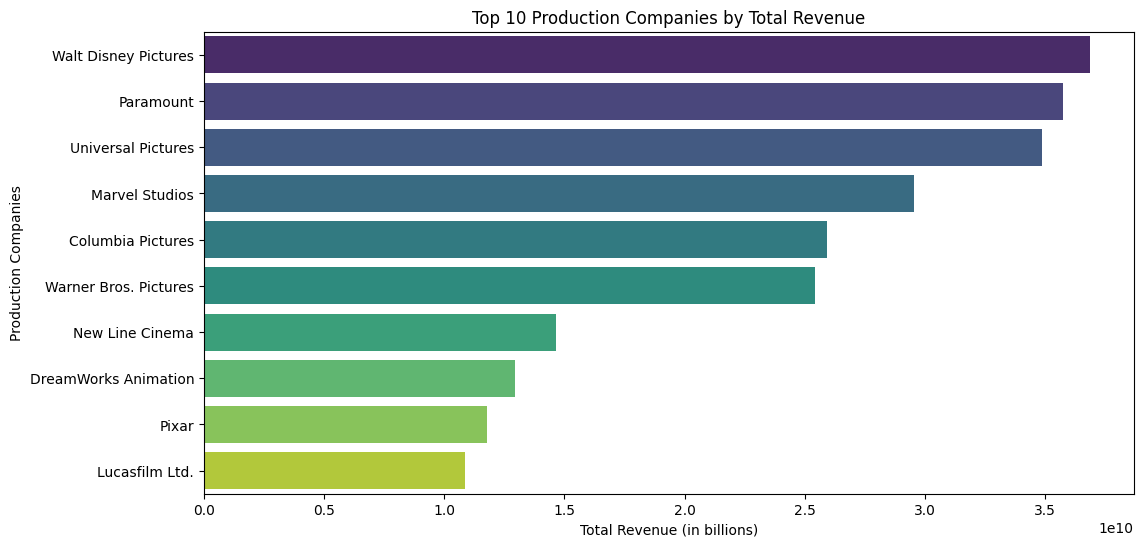

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'release_date' is in datetime format, if not, convert it first
released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])

# Extract the release year for better analysis
released_movies['release_year'] = released_movies['release_date'].dt.year

# Select relevant columns for analysis
columns_for_analysis = ['production_companies', 'vote_average', 'revenue']

# Drop rows with missing values in relevant columns
movies_analysis = released_movies[columns_for_analysis].dropna()

# Extract individual production companies from the 'production_companies' column
movies_analysis['production_companies'] = movies_analysis['production_companies'].apply(lambda x: x.split(',')[0] if x else '')

# Group by production companies and calculate average vote and total revenue
company_stats = movies_analysis.groupby('production_companies').agg({
    'vote_average': 'mean',
    'revenue': 'sum'
}).reset_index()

# Select the top 10 production companies based on revenue
top_n_companies_by_revenue = company_stats.nlargest(10, 'revenue')

# Visualize the top N production companies by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='production_companies', data=top_n_companies_by_revenue, palette='viridis')
plt.title(f'Top {10} Production Companies by Total Revenue')
plt.xlabel('Total Revenue (in billions)')
plt.ylabel('Production Companies')
plt.show()


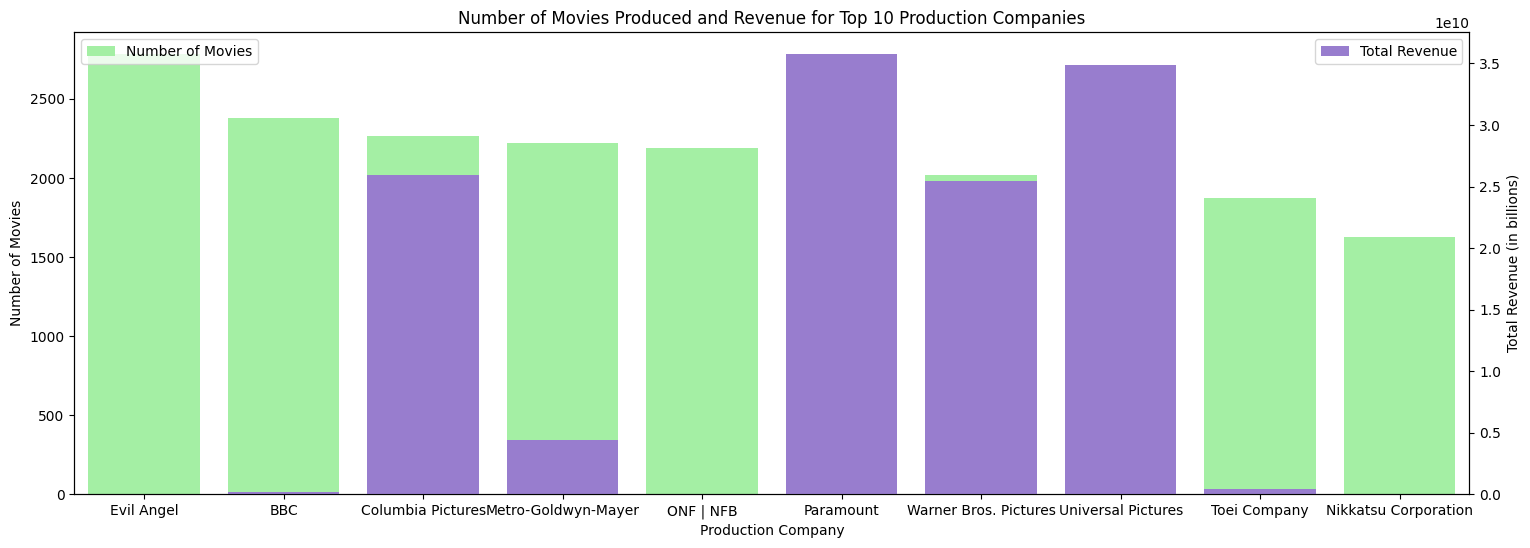

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'production_companies' is a column in your DataFrame
# Load your data or replace 'your_dataframe' with the actual variable name
# released_movies = pd.read_csv('your_dataset.csv')

# Split multiple production companies into individual rows
movies_companies = released_movies['production_companies'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('production_company')

# Merge the new production_company column with the original DataFrame
released_movies_companies = released_movies.drop('production_companies', axis=1).join(movies_companies)

# Get the top 10 production companies
top_companies = released_movies_companies['production_company'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 production companies
released_movies_top_companies = released_movies_companies[released_movies_companies['production_company'].isin(top_companies)]

# Set pale green and purple colors
pale_green = "#98FB98"
purple = "#9370DB"

# Create a bar plot for the number of movies produced
plt.figure(figsize=(18, 6))
ax1 = sns.countplot(x='production_company', data=released_movies_top_companies, color=pale_green, order=top_companies, label='Number of Movies')
ax1.set_title('Number of Movies Produced and Revenue for Top 10 Production Companies')
ax1.set_xlabel('Production Company')
ax1.set_ylabel('Number of Movies')

# Create a secondary y-axis for revenue using purple color
ax2 = ax1.twinx()
sns.barplot(x='production_company', y='revenue', data=released_movies_top_companies.groupby('production_company')['revenue'].sum().reset_index(), color=purple, ax=ax2, order=top_companies, label='Total Revenue')
ax2.set_ylabel('Total Revenue (in billions)')

# Set labels for both axes
ax1.set_xlabel('Production Company')
ax1.set_ylabel('Number of Movies')

# Show the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


<ipython-input-53-c222c314cb9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])
<ipython-input-53-c222c314cb9f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released_movies['release_month'] = released_movies['release_date'].dt.month


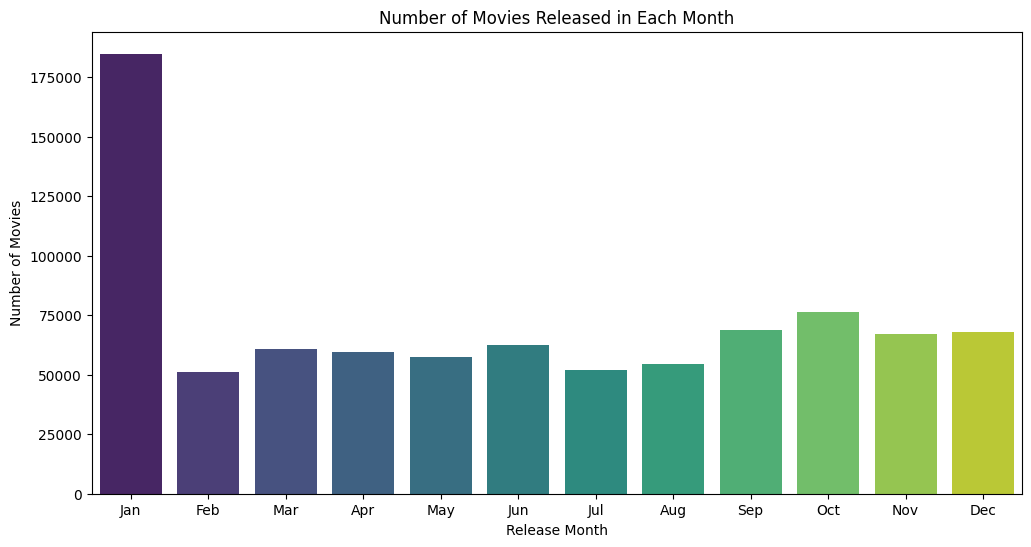

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'release_date' is in datetime format, if not, convert it first
released_movies['release_date'] = pd.to_datetime(released_movies['release_date'])

# Extract the release month
released_movies['release_month'] = released_movies['release_date'].dt.month

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='release_month', data=released_movies, palette='viridis')

# Customize the plot
plt.title('Number of Movies Released in Each Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()

# Predict movie revenue

In [ ]:

dataset = released_movies[['revenue', 'popularity', 'runtime', 'vote_average', 'vote_count', 'budget', 'original_language', 'adult']].copy()

In [ ]:
dataset.head()

revenue  popularity  runtime  vote_average  vote_count     budget  \
0   825532764      83.952      148         8.364       34495  160000000   
1   701729206     140.241      169         8.417       32571  165000000   
2  1004558444     130.643      152         8.512       30619  185000000   
3  2923706026      79.932      162         7.573       29815  237000000   
4  1518815515      98.082      143         7.710       29166  220000000   

   original_language  adult  
0                  0      0  
1                  0      0  
2                  0      0  
3                  0      0  
4                  0      0

In [ ]:
import sklearn.model_selection
import sklearn.preprocessing

positive_dataset = dataset.reindex(dataset[dataset.revenue > 0].index)
X_positive = positive_dataset.drop('revenue', axis = 1)
y_positive = positive_dataset['revenue']
scaler_positive = sklearn.preprocessing.StandardScaler().fit(X_positive)
X_positive_scaled = scaler_positive.transform(X_positive)



Standard Scalar

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming y_positive is a Pandas Series containing the data to be scaled

# Step 1: Convert the Pandas Series to a NumPy array and reshape it to 2D for scaling
y_positive_reshaped = y_positive.values.reshape(-1, 1)

# Step 2: Initialize and fit the StandardScaler on the reshaped data
scaler = StandardScaler()
scaler.fit(y_positive_reshaped)

# Step 3: Transform the data using the fitted scaler
y_positive_scaled = scaler.transform(y_positive_reshaped)

# Step 4: Convert the scaled data back into a Pandas DataFrame
y_positive_scaled_df = pd.DataFrame(y_positive_scaled, columns=['Scaled_Revenue'])

# Step 5: Display the first five rows of the scaled data
print(y_positive_scaled_df.head())


   Scaled_Revenue
0        6.444014
1        5.428411
2        7.912624
3       23.656057
4       12.131253


In [ ]:
y_positive.head()

0     825532764
1     701729206
2    1004558444
3    2923706026
4    1518815515
Name: revenue, dtype: int64

In [ ]:
type(y_positive_scaled_df)

pandas.core.frame.DataFrame

In [ ]:
y_positive.head()

0     825532764
1     701729206
2    1004558444
3    2923706026
4    1518815515
Name: revenue, dtype: int64

In [ ]:
X_train_positive, X_test_positive, y_train_positive, y_test_positive = sklearn.model_selection.train_test_split(
    X_positive_scaled, y_positive_scaled_df,
    test_size = 0.3,
    train_size = None,
    random_state = 42,
    shuffle = True,
    stratify = None
)

OLS regression model

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_positive, y_train_positive)

# Make predictions using the testing set
y_pred_positive = regr.predict(X_test_positive)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_positive, y_pred_positive))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_positive, y_pred_positive))


Mean squared error: 0.34
Coefficient of determination: 0.68


Catboost model

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


Alpha: 0.01, Mean squared error: 0.49, Coefficient of determination (R2): 0.55
Alpha: 0.05, Mean squared error: 0.30, Coefficient of determination (R2): 0.72
Alpha: 0.1, Mean squared error: 0.29, Coefficient of determination (R2): 0.73
Alpha: 0.2, Mean squared error: 0.31, Coefficient of determination (R2): 0.71
Alpha: 0.3, Mean squared error: 0.30, Coefficient of determination (R2): 0.72


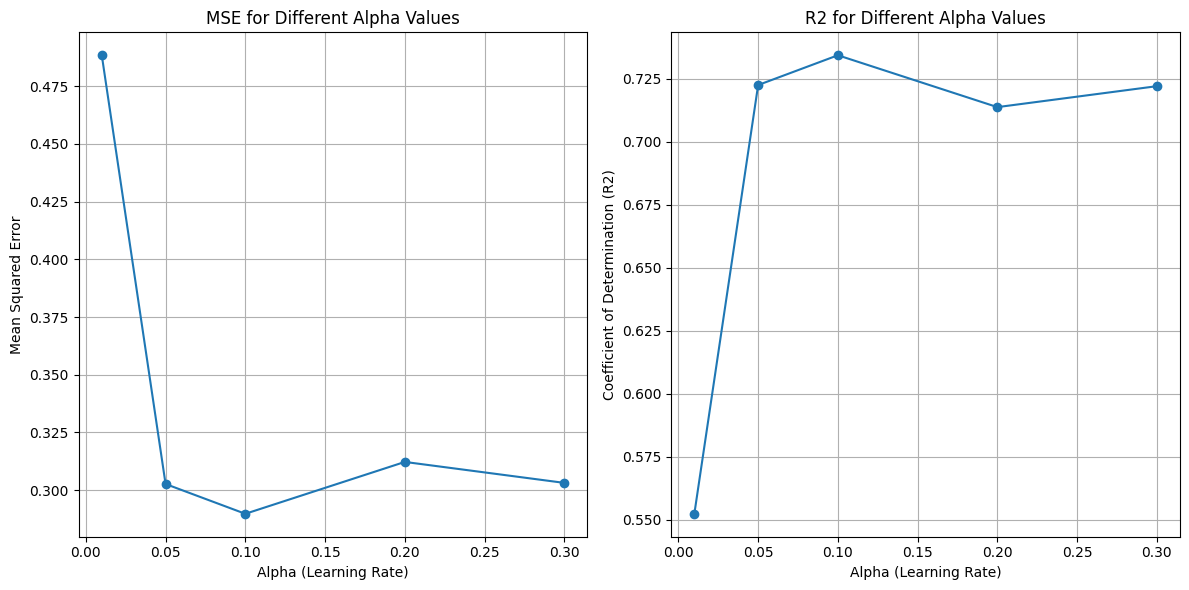

In [ ]:
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a range of alpha (learning_rate) values to test
alphas = [0.01, 0.05, 0.1, 0.2, 0.3]
mse_values = []
r2_values = []

for alpha in alphas:
    regr = CatBoostRegressor(iterations=100, learning_rate=alpha, depth=10, verbose=0)

    # Train the model using the training sets
    regr.fit(X_train_positive, y_train_positive)

    # Make predictions using the testing set
    y_pred_positive = regr.predict(X_test_positive)

    # Calculate and store the mean squared error and R2 score
    mse = mean_squared_error(y_test_positive, y_pred_positive)
    mse_values.append(mse)
    r2 = r2_score(y_test_positive, y_pred_positive)
    r2_values.append(r2)

    # Optionally print the MSE and R2 for each alpha
    print(f"Alpha: {alpha}, Mean squared error: {mse:.2f}, Coefficient of determination (R2): {r2:.2f}")

# Plotting the results for MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_values, marker='o')
plt.xlabel('Alpha (Learning Rate)')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Alpha Values')
plt.grid(True)

# Plotting the results for R2
plt.subplot(1, 2, 2)
plt.plot(alphas, r2_values, marker='o')
plt.xlabel('Alpha (Learning Rate)')
plt.ylabel('Coefficient of Determination (R2)')
plt.title('R2 for Different Alpha Values')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 7.6 MB/s eta 0:00:00


XGBoost model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:54:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


n_estimators: 10, Mean squared error: 0.31, Coefficient of determination (R2): 0.72


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:54:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


n_estimators: 50, Mean squared error: 0.32, Coefficient of determination (R2): 0.70


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:54:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


n_estimators: 100, Mean squared error: 0.33, Coefficient of determination (R2): 0.69


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:54:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


n_estimators: 200, Mean squared error: 0.34, Coefficient of determination (R2): 0.69


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:54:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


n_estimators: 500, Mean squared error: 0.35, Coefficient of determination (R2): 0.68


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:54:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


n_estimators: 1000, Mean squared error: 0.35, Coefficient of determination (R2): 0.68


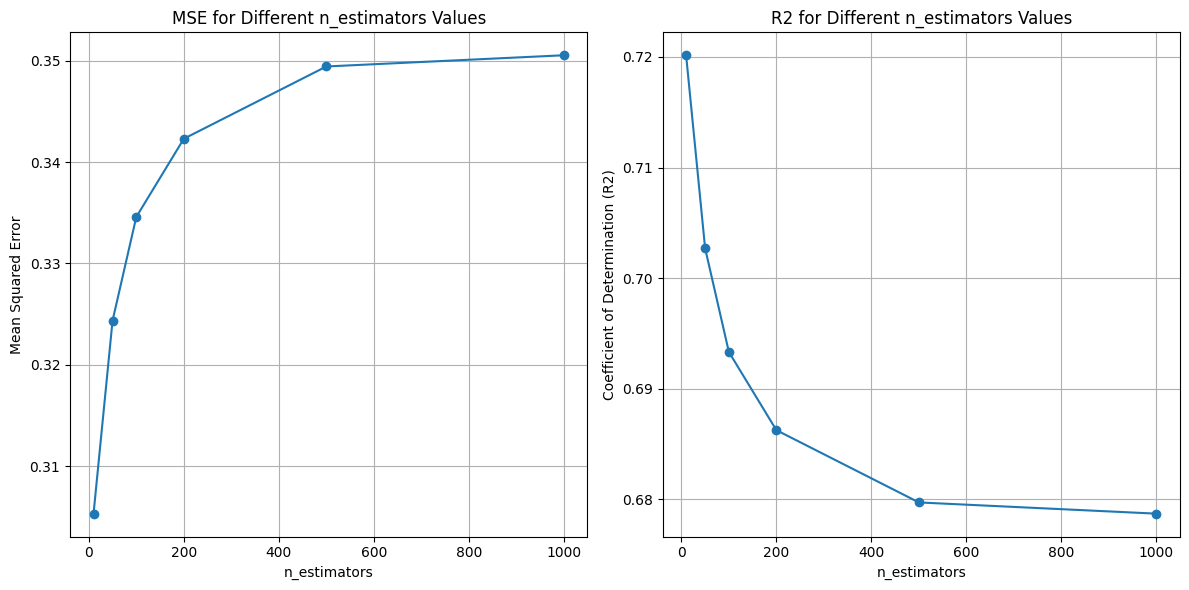

In [ ]:
import xgboost as xg
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define a range of n_estimators values to test
n_estimators_range = [10, 50, 100, 200, 500, 1000]
mse_values = []
r2_values = []

for n_estimators in n_estimators_range:
    regr = xg.XGBRegressor(objective='reg:linear',
                           n_estimators=n_estimators,
                           seed=123)

    # Train the model using the training sets
    regr.fit(X_train_positive, y_train_positive)

    # Make predictions using the testing set
    y_pred_positive = regr.predict(X_test_positive)

    # Calculate and store the mean squared error and R2 score
    mse = mean_squared_error(y_test_positive, y_pred_positive)
    mse_values.append(mse)
    r2 = r2_score(y_test_positive, y_pred_positive)
    r2_values.append(r2)

    # Optionally print the MSE and R2 for each n_estimators value
    print(f"n_estimators: {n_estimators}, Mean squared error: {mse:.2f}, Coefficient of determination (R2): {r2:.2f}")

# Plotting the results for MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_values, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different n_estimators Values')
plt.grid(True)

# Plotting the results for R2
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_values, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Coefficient of Determination (R2)')
plt.title('R2 for Different n_estimators Values')
plt.grid(True)

plt.tight_layout()
plt.show()


Random forest model

<ipython-input-41-2ccd9a1bb7eb>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_positive, y_train_positive)


n_estimators: 10, Mean squared error: 0.32, Coefficient of determination: 0.71


<ipython-input-41-2ccd9a1bb7eb>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_positive, y_train_positive)


n_estimators: 50, Mean squared error: 0.29, Coefficient of determination: 0.74


<ipython-input-41-2ccd9a1bb7eb>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_positive, y_train_positive)


n_estimators: 100, Mean squared error: 0.28, Coefficient of determination: 0.74


<ipython-input-41-2ccd9a1bb7eb>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_positive, y_train_positive)


n_estimators: 200, Mean squared error: 0.28, Coefficient of determination: 0.75


<ipython-input-41-2ccd9a1bb7eb>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_positive, y_train_positive)


n_estimators: 500, Mean squared error: 0.28, Coefficient of determination: 0.74


<ipython-input-41-2ccd9a1bb7eb>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_positive, y_train_positive)


n_estimators: 1000, Mean squared error: 0.28, Coefficient of determination: 0.74


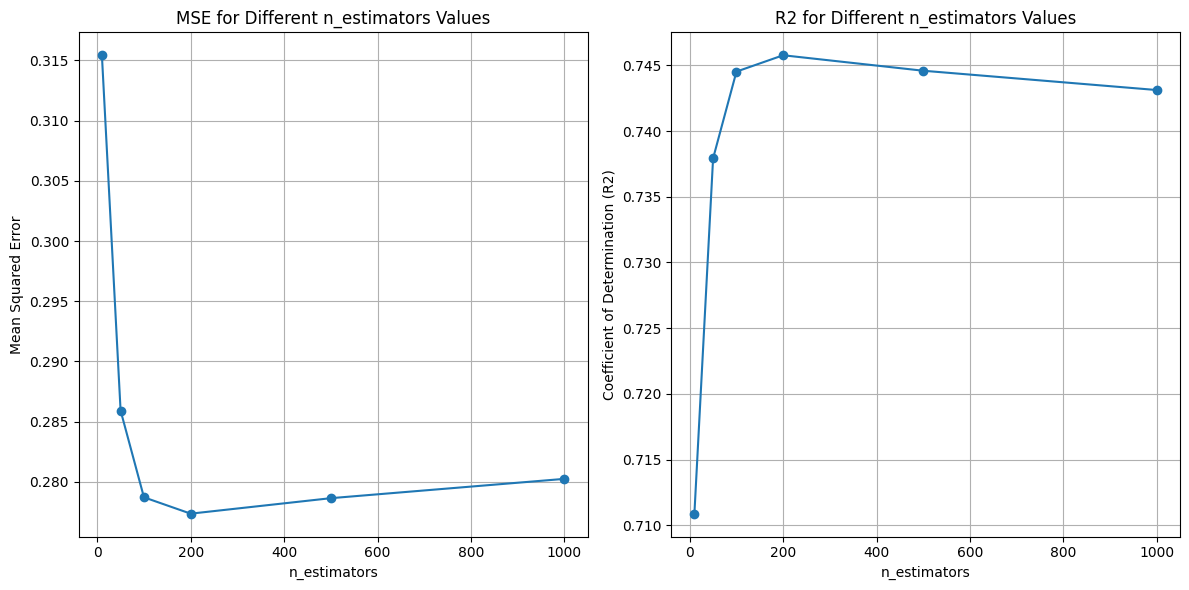

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a range of n_estimators values to test
n_estimators_range = [10, 50, 100, 200, 500, 1000]
mse_values = []
r2_values = []

for n_estimators in n_estimators_range:
    regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=100, random_state=5)

    # Train the model using the training sets
    regr.fit(X_train_positive, y_train_positive)

    # Make predictions using the testing set
    y_pred_positive = regr.predict(X_test_positive)

    # Calculate and store the mean squared error and R2 score
    mse = mean_squared_error(y_test_positive, y_pred_positive)
    r2 = r2_score(y_test_positive, y_pred_positive)
    mse_values.append(mse)
    r2_values.append(r2)

    # Optionally print the MSE and R2 for each n_estimators value
    print(f"n_estimators: {n_estimators}, Mean squared error: {mse:.2f}, Coefficient of determination: {r2:.2f}")

# Plotting the results for MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_values, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different n_estimators Values')
plt.grid(True)

# Plotting the results for R2
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_values, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Coefficient of Determination (R2)')
plt.title('R2 for Different n_estimators Values')
plt.grid(True)

plt.tight_layout()
plt.show()


Decision tree regression

max_depth: 10, Mean squared error: 0.41, Coefficient of determination: 0.62
max_depth: 30, Mean squared error: 0.48, Coefficient of determination: 0.56
max_depth: 70, Mean squared error: 0.50, Coefficient of determination: 0.54
max_depth: 100, Mean squared error: 0.50, Coefficient of determination: 0.54
max_depth: 200, Mean squared error: 0.50, Coefficient of determination: 0.54
max_depth: 300, Mean squared error: 0.50, Coefficient of determination: 0.54
max_depth: 500, Mean squared error: 0.50, Coefficient of determination: 0.54
max_depth: 700, Mean squared error: 0.50, Coefficient of determination: 0.54
max_depth: 1000, Mean squared error: 0.50, Coefficient of determination: 0.54


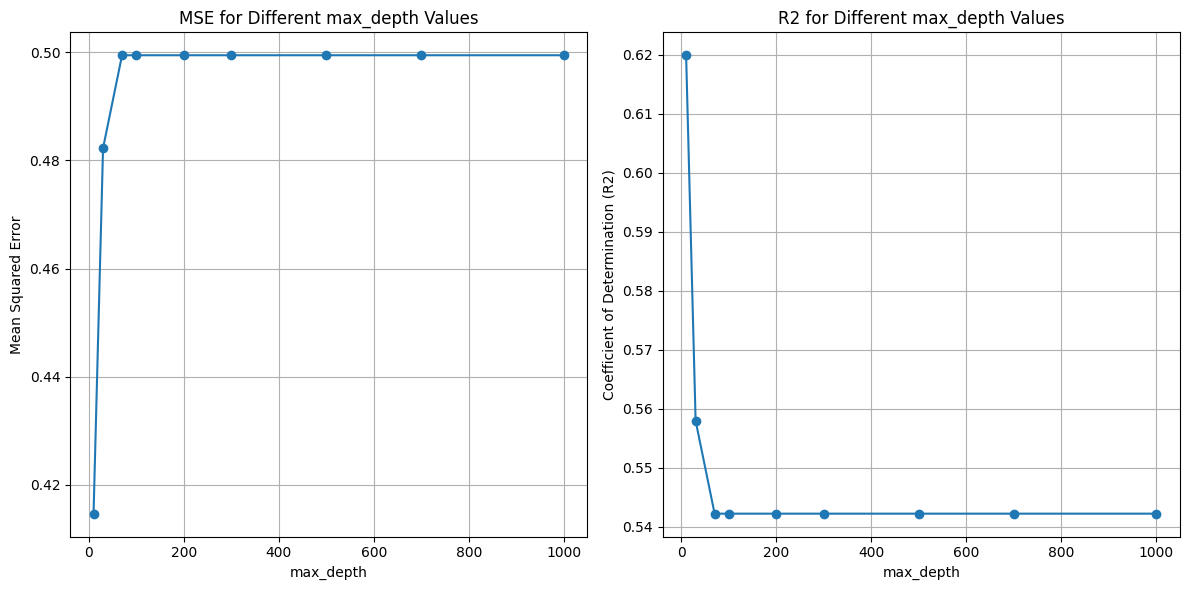

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

# Define a range of max_depth values to test
max_depth_range = [10, 30, 70, 100, 200, 300, 500, 700, 1000]
mse_values = []
r2_values = []

for max_depth in max_depth_range:
    regr = tree.DecisionTreeRegressor(random_state=20, max_depth=max_depth)

    # Train the model using the training sets
    regr.fit(X_train_positive, y_train_positive)

    # Make predictions using the testing set
    y_pred_positive = regr.predict(X_test_positive)

    # Calculate and store the mean squared error and R2 score
    mse = mean_squared_error(y_test_positive, y_pred_positive)
    r2 = r2_score(y_test_positive, y_pred_positive)
    mse_values.append(mse)
    r2_values.append(r2)

    # Optionally print the MSE and R2 for each max_depth value
    print(f"max_depth: {max_depth}, Mean squared error: {mse:.2f}, Coefficient of determination: {r2:.2f}")

# Plotting the results for MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(max_depth_range, mse_values, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different max_depth Values')
plt.grid(True)

# Plotting the results for R2
plt.subplot(1, 2, 2)
plt.plot(max_depth_range, r2_values, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Coefficient of Determination (R2)')
plt.title('R2 for Different max_depth Values')
plt.grid(True)

plt.tight_layout()
plt.show()
